## Exercise 1: The best KNN classifier

Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. Hint: the `KNeighborsClassifier` works quite well for this task; you need to find good hyperparameters (grid search on `weights` and `n_neighbors` hyperparameters).

In [ ]:
# Load MNIST
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1, as_frame = False)

In [ ]:
X = mnist.data
y = mnist.target

In [ ]:
import matplotlib.pyplot as plt

# Visually represent a digit
digit = X[7]
digit.shape

(784,)

In [ ]:
# Matplotlib needs ideally a square matrix to be able to show the image
import numpy as np
np.sqrt(784)

28.0

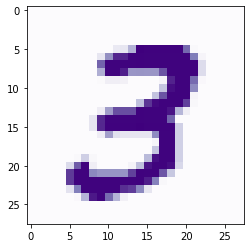

In [ ]:
plt.imshow(digit.reshape(28,28), cmap = 'Purples')

In [ ]:
# Just for fun let's make that into a function

def digit_image(number:int):
    if number>784:
        raise ValueError('The number cannot exceed 784.')
    digit = X[number].reshape(28,28)
    
    
    plt.imshow(digit,cmap = 'Purples')
    plt.axis('off')
    plt.show()
        

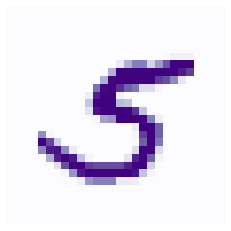

In [ ]:
digit_image(239)

In [ ]:
# Create training and testing datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size = 0.4 )

In [ ]:
# KNN with best parameters
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights' : ['uniform','distance'],'n_neighbors' : [3,4,5,6,7]}]

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv = 5, verbose=3)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .................n_neighbors=3, weights=uniform; total time= 4.9min
[CV 2/5] END .................n_neighbors=3, weights=uniform; total time= 4.8min
[CV 3/5] END .................n_neighbors=3, weights=uniform; total time= 4.5min
[CV 4/5] END .................n_neighbors=3, weights=uniform; total time= 4.5min
[CV 5/5] END .................n_neighbors=3, weights=uniform; total time= 4.5min
[CV 1/5] END ................n_neighbors=3, weights=distance; total time= 4.8min
[CV 2/5] END ................n_neighbors=3, weights=distance; total time= 4.8min
[CV 3/5] END ................n_neighbors=3, weights=distance; total time= 4.7min
[CV 4/5] END ................n_neighbors=3, weights=distance; total time= 4.7min
[CV 5/5] END ................n_neighbors=3, weights=distance; total time= 4.7min
[CV 1/5] END .................n_neighbors=4, weights=uniform; total time= 4.8min
[CV 2/5] END .................n_neighbors=4, wei

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 6, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [ ]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [ ]:
grid_search.best_score_

0.9694523809523808

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

**I forgot to save the best model, it took 4-5 hours of training/testing, I won't do it again but only train the best model.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4, weights = 'distance')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(f'The accuracy of this model is {accuracy_score(y_test,y_pred)} on the test set.')

The accuracy of this model is 0.9717142857142858 on the test set.


## Exercise 2: Data augmentation

Write a function that can shift an MNIST image in any direction (left,right,up or down) by one pixel. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should obsercve that your model performs even better now ! This technique of artificially growing the training set is called *data augmentations* or *training set expansion*.

In [ ]:
 from scipy.ndimage.interpolation import shift

In [ ]:
def shift_image(image,y,x):
  image = image.reshape(28,28)
  image = shift(image,[y,x],cval = 0)
  return image.reshape(-1)

The `shift` function allows us to shift an image. First, we need to have an image and not just an array of numbers. This is the reason we start by reshaping our array into a 28 x 28 matrix. Second, the arguments of the `shift` function are 1) along the y axis and 2) along x axis. The first arguments tells us how much DOWN will the picture go. 2 means 2 points down, -2 means 2 points up. The second argument tells us how much to the RIGHT will the image go. Finally, we need our final outcome to be an array of numbers and not an image, therefore we will reshape back our data. `reshape` with (-1) as an argument tells the function to remove 1 dimension. Because it is was a 2D array, now it became a 1D array.